In [1]:
import numpy as np

timesteps=100
input_features=32
output_features = 64

inputs = np.random.random((timesteps,input_features))

state_t = np.zeros((output_features,)) # Initial State

W=np.random.random((output_features,input_features))
U=np.random.random((output_features,output_features))
b=np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W,input_t)+np.dot(U,state_t)+b)
    successive_outputs.append(output_t)
    state_t = output_t 
    
final_output_sequence = np.stack(successive_outputs,axis=0)


In [5]:
final_output_sequence.shape

(100, 64)

In [9]:
from keras.layers import SimpleRNN,Embedding # Expect (Batch_size, timesteps, Input_features)
from keras.models import Sequential
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000 # Feature Words (BOW)
maxlen = 500 # max word length ( [:500])
batch_size = 32

print('DATA LOADING...')
(input_train,y_train),(input_test,y_test)=imdb.load_data(num_words=max_features)
print(len(input_train),'Train Sequences')
print(len(input_test),'Test Sequences')
print('Sequence Padding (Samples x maxlen)')
input_train=sequence.pad_sequences(input_train,maxlen=maxlen)
input_test=sequence.pad_sequences(input_test,maxlen=maxlen)
print('input_train shape:',input_train.shape)
print('input_test shape:',input_test.shape)

DATA LOADING...
25000 Train Sequences
25000 Test Sequences
Sequence Padding (Samples x maxlen)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [12]:
from keras.layers import Dense

model=Sequential()
model.add(Embedding(max_features,32)) # 10000 word  32 D  mapping
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(input_train,y_train,epochs=10,batch_size=128,validation_split=.2)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 20000 samples, validate on 5000 samples
Epoch 1/10





20000/20000 [==============================] - 27s 1ms/step - loss: 0.6303 - acc: 0.6290 - val_loss: 0.4764 - val_acc: 0.7918
Epoch 2/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.4189 - acc: 0.8187 - val_loss: 0.5044 - val_acc: 0.7834
Epoch 3/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.2986 - acc: 0.8801 - val_loss: 0.3846 - val_acc: 0.8308
Epoch 4/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.2511 - acc: 0.9011 - val_loss: 0.3912 - val_acc: 0.8390
Epoch 5/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.1783 - acc: 0.9349 - val_loss: 0.4066 - val_acc: 0.8570
Epoch 6/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.1217 - acc: 0.9572 - val_loss: 0.4293 - val_acc: 0.8476
Epoch 7/10
20000/20000

In [ ]:
def plot_loss(history):

  fig,axes=plt.subplots(1,2,figsize=(14,6))
  train_categorical_crossentropy=history.history['loss'] 
  validation_categorical_crossentropy=history.history['val_loss']
  xlimit=range(1,len(validation_categorical_crossentropy)+1)
  axes[0].plot(xlimit,train_categorical_crossentropy,'r',label='Training Loss')
  axes[0].plot(xlimit,validation_categorical_crossentropy,'b',label='Validation Loss')
  axes[0].set_title('Losses Graph')
  axes[0].set_xlabel('Epochs')
  axes[0].set_ylabel('Loss')
  axes[0].legend()
  
  

  train_acc=history.history['acc'] 
  validation_acc=history.history['val_acc']
  xlimit=range(1,len(validation_acc)+1)
  axes[1].plot(xlimit,train_acc,'r',label='Training  acc')
  axes[1].plot(xlimit,validation_acc,'b',label='Validation  acc')
  axes[1].set_title('Acc Graph')
  axes[1].set_xlabel('Epochs')
  axes[1].set_ylabel('Acc')
  axes[1].legend()

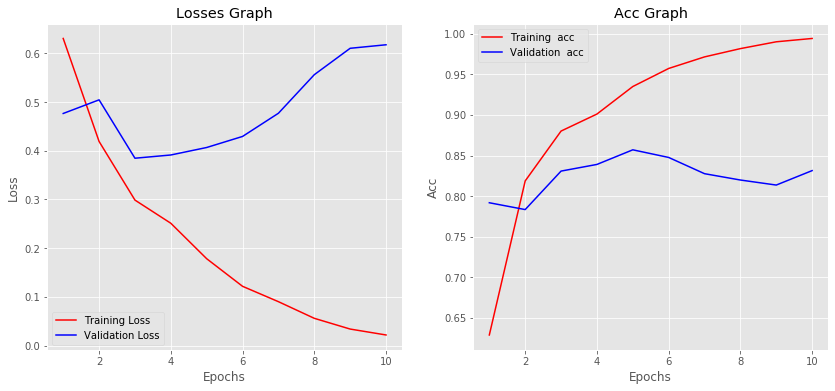

In [21]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plot_loss(history)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 92s 5ms/step - loss: 0.5126 - acc: 0.7605 - val_loss: 0.4323 - val_acc: 0.8062
Epoch 2/10
20000/20000 [==============================] - 92s 5ms/step - loss: 0.2966 - acc: 0.8838 - val_loss: 0.3364 - val_acc: 0.8508
Epoch 3/10
20000/20000 [==============================] - 91s 5ms/step - loss: 0.2346 - acc: 0.9099 - val_loss: 0.3101 - val_acc: 0.8870
Epoch 4/10
20000/20000 [==============================] - 90s 4ms/step - loss: 0.1935 - acc: 0.9284 - val_loss: 0.4874 - val_acc: 0.8646
Epoch 5/10
20000/20000 [==============================] - 90s 4ms/step - loss: 0.1755 - acc: 0.9353 - val_loss: 0.2975 - val_acc: 0.8864
Epoch 6/10
20000/20000 [==============================] - 91s 5ms/step - loss: 0.1531 - acc: 0.9443 - val_loss: 0.3761 - val_acc: 0.8782
Epoch 7/10
20000/20000 [==============================] - 89s 4ms/step - loss: 0.1421 - acc: 0.9485 - val_loss: 0.5074 - val_acc:

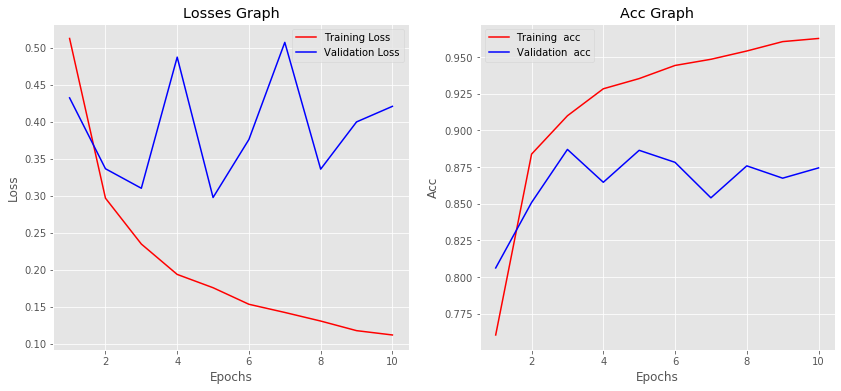

In [22]:
from keras.layers import LSTM
model=Sequential()
model.add(Embedding(max_features,32))
model.add(LSTM(32))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=model.fit(input_train,y_train,epochs=10,batch_size=128,validation_split=0.2)
plot_loss(history)

In [1]:
import os
data_dir = r'C:\Users\집\data\jena_climate\jena_climate_2009_2016.csv'
fname = os.path.join(data_dir,'jena_climate_2009_2016.csv')
f=open(fname)
data=f.read()
f.close()

In [2]:
lines=data.split('\n')
header=lines[0].split(',')
lines=lines[1:]

print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


In [3]:
import numpy as np

float_data = np.zeros((len(lines),len(header)-1))
for i,line in enumerate(lines):
    values=[float(x) for x in line.split(',')[1:]]
    float_data[i,:]=values

In [4]:
temp=float_data[:,1] # Temperature
plt.plot(range(len(temp)),temp)

NameError: name 'plt' is not defined

In [ ]:
plt.plot(range(1440),temp[:1440])

In [ ]:
mean=float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

In [5]:
def generator(data,lookback,delay,min_index,max_index,shuffle=False,batch_size=128,step=6):
    if max_index is None:
        max_index = len(data)-delay-1
    i=min_index+lookback    
    while 1:
        if shuffle:
            rows = np.random.randint(min_index+lookback,max_index,size = batch_size)
        else:
            if i+batch_size>=max_index:
                i=min_index+lookback
            rows=np.arange(i,min(i+batch_size,max_index))
            i+=len(rows)
            
        samples = np.zeros((len(rows),lookback//step,data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j,row in enumerate(rows):
            indices = range(rows[j]-lookback,rows[j],step)
            samples[j] = data[indices]
            targets[j] = data[rows[j]+delay][1]
        yield samples,targets

In [6]:
lookback=1440
step=6
delay=144
batch_size=128
train_gen = generator(float_data,lookback=lookback,delay=delay,min_index=0,max_index=200000,shuffle=True,step=step,
                     batch_size=batch_size)
val_gen = generator(float_data,lookback=lookback,delay=delay,min_index=200001,max_index=300000,step=step,
                     batch_size=batch_size)
test_gen = generator(float_data,lookback=lookback,delay=delay,min_index=300001,max_index=None,step=step,
                     batch_size=batch_size)
val_steps=(300000-200001-lookback)//batch_size
test_steps=(len(float_data)-300001-lookback)//batch_size

In [7]:
def evaluate_naive_method():
    batch_maes=[]
    for step in range(val_steps):
        samples,targets = next(val_gen)
        preds = samples[:,-1,1]
        mae = np.mean(np.abs(preds-targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))
evaluate_naive_method()

2.564887434980494


In [8]:
celsius_mae=0.29*std[1]
celsius_mae

NameError: name 'std' is not defined

In [54]:
from keras import layers
model=Sequential()
model.add(layers.Flatten(input_shape=(lookback//step,float_data.shape[-1])))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop',loss='mae')
history=model.fit_generator(train_gen,steps_per_epoch=500,epochs=20,validation_data=val_gen,validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 19s 37ms/step - loss: 1.5204 - val_loss: 0.8106
Epoch 2/20
500/500 [==============================] - 18s 36ms/step - loss: 0.5279 - val_loss: 0.3413
Epoch 3/20
500/500 [==============================] - 18s 36ms/step - loss: 0.3087 - val_loss: 0.3026
Epoch 4/20
500/500 [==============================] - 18s 36ms/step - loss: 0.2744 - val_loss: 0.3311
Epoch 5/20
500/500 [==============================] - 20s 40ms/step - loss: 0.3033 - val_loss: 0.3068
Epoch 6/20
500/500 [==============================] - 19s 39ms/step - loss: 0.2520 - val_loss: 0.3110
Epoch 7/20
500/500 [==============================] - 18s 36ms/step - loss: 0.2434 - val_loss: 0.3310
Epoch 8/20
500/500 [==============================] - 18s 36ms/step - loss: 0.2351 - val_loss: 0.3180
Epoch 9/20
500/500 [==============================] - 18s 36ms/step - loss: 0.2317 - val_loss: 0.3215
Epoch 10/20
500/500 [==============================] - 18s 36ms/step - loss: 0.227

KeyError: 'acc'

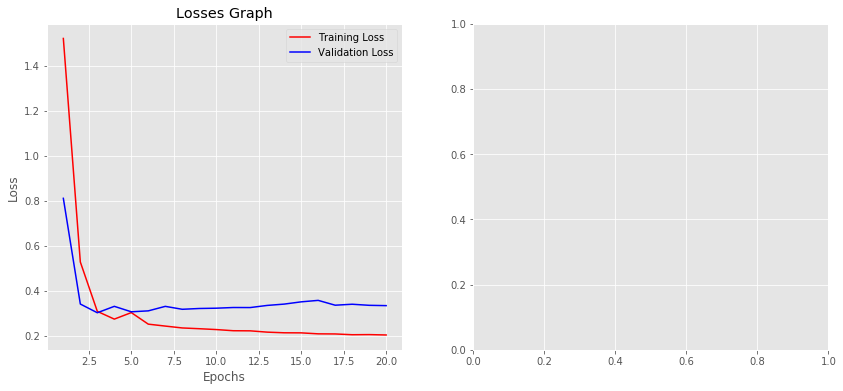

In [55]:
plot_loss(history)

In [11]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,input_shape=(None,float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop',loss='mae',metrics=['mse'])
history=model.fit_generator(train_gen,steps_per_epoch=500,epochs=10,validation_data=val_gen,validation_steps=val_steps)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





500/500 [==============================] - 126s 252ms/step - loss: 7.5734 - mean_squared_error: 87.1171 - val_loss: 6.5474 - val_mean_squared_error: 63.8506
Epoch 2/10
500/500 [==============================] - 118s 235ms/step - loss: 6.7808 - mean_squared_error: 70.8890 - val_loss: 6.3922 - val_mean_squared_error: 61.3288:  - ETA: 8s - loss: 6.7946 - ETA: 3s - loss: 6.7846 - mean_sq
Epoch 3/10
500/500 [==============================] - 118s 235ms/step - loss: 6.6247 - mean_squared_error: 68.3031 - val_loss: 6.2268 - val_mean_squared_error: 58.7276
Epoch 4/10
500/500 [==============================] - 117s 234ms/step - loss: 6.5151 - mean_squared_error: 66.4526 - val_loss: 6.0810 - val_mean_squared_error: 56.4877
Epoch 5/10
500/500 [==============================] - 117s 234ms/step - loss: 6.3184 - mean_squared_error: 62.8865 - val_loss: 5.9438 - val_mean_squared_error: 54.3

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential

max_features=10000
maxlen = 500

(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=max_features)

x_train=[x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

x_train = sequence.pad_sequences(x_train,maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen = maxlen)

model= Sequential()
model.add(layers.Embedding(max_features,128))
model.add(layers.Bidirectional(layers.LSTM(32))) # keras.layers.Bidriectional
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2)